# Task 4.3P - Build your own image recognition system – group task
Brenton Adey
s222165064

## Import libraries

In [1]:
import os

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score

from yellowbrick.cluster import silhouette_visualizer, intercluster_distance

# 2. Building image recognition application

## 2.1. Building BoW model (Silhouette analysis)

In [2]:
class Dictionary(object):
    def __init__(self, name, img_filenames, num_words):
        self.name = name #name of your dictionary
        self.img_filenames = img_filenames #list of image filenames
        self.num_words = num_words #the number of words
        self.training_data = [] #this is the training data required by the K-Means algorithm
        self.words = [] #list of words, which are the centroids of clusters
    
    def learn(self):
        sift = cv.SIFT_create()
        num_keypoints = [] #this is used to store the number of keypoints in each image
        #load training images and compute SIFT descriptors
        for filename in self.img_filenames:
            img = cv.imread(filename)
            img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            list_des = sift.detectAndCompute(img_gray, None)[1]
            if list_des is None:
                num_keypoints.append(0)
            else:
                num_keypoints.append(len(list_des))
                for des in list_des:
                    self.training_data.append(des)
        #cluster SIFT descriptors using K-means algorithm
        kmeans = KMeans(self.num_words)
        kmeans.fit(self.training_data)
        self.words = kmeans.cluster_centers_
        #create word histograms for training images
        training_word_histograms = [] #list of word histograms of all training images
        index = 0
        for i in range(0, len(self.img_filenames)):
            #for each file, create a histogram
            histogram = np.zeros(self.num_words, np.float32)
            #if some keypoints exist
            if num_keypoints[i] > 0:
                for j in range(0, num_keypoints[i]):
                    histogram[kmeans.labels_[j + index]] += 1
                index += num_keypoints[i]
                histogram /= num_keypoints[i]
                training_word_histograms.append(histogram)
        return training_word_histograms

    def create_word_histograms(self, img_filenames):
        sift = cv.SIFT_create()
        histograms = []
        for filename in img_filenames:
            img = cv.imread(filename)
            img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            descriptors = sift.detectAndCompute(img_gray, None)[1]
            histogram = np.zeros(self.num_words, np.float32) #word histogram for the input image
            if descriptors is not None:
                for des in descriptors:
                    #find the best matching word
                    min_distance = 1111111 #this can be any large number
                    matching_word_ID = -1 #initial matching_word_ID=-1 means no matching
                    for i in range(0, self.num_words): #search for the best matching word
                        distance = np.linalg.norm(des - self.words[i])
                        if distance < min_distance:
                            min_distance = distance
                            matching_word_ID = i
                    histogram[matching_word_ID] += 1
                histogram /= len(descriptors) #normalise histogram to frequencies
            histograms.append(histogram)
        return histograms

In [3]:
import os

breeds = ["shiba_inu", "american_bulldog", "basset_hound", "chihuahua"]
path = 'images/'
training_file_names = []
training_breed_labels = []
for i, breed in enumerate(breeds):
    sub_path = path + 'train/'
    sub_file_names = [os.path.join(sub_path, file) for file in os.listdir(sub_path) if file.startswith(breed)]
    sub_breed_labels = [i] * len(sub_file_names) #create a list of N elements, all are i
    training_file_names += sub_file_names
    training_breed_labels += sub_breed_labels

print(training_file_names)
print(training_breed_labels)

['images/train/shiba_inu_57.jpg', 'images/train/shiba_inu_80.jpg', 'images/train/shiba_inu_94.jpg', 'images/train/shiba_inu_95.jpg', 'images/train/shiba_inu_137.jpg', 'images/train/shiba_inu_68.jpg', 'images/train/shiba_inu_40.jpg', 'images/train/shiba_inu_96.jpg', 'images/train/shiba_inu_41.jpg', 'images/train/shiba_inu_108.jpg', 'images/train/shiba_inu_79.jpg', 'images/train/shiba_inu_92.jpg', 'images/train/shiba_inu_87.jpg', 'images/train/shiba_inu_93.jpg', 'images/train/shiba_inu_78.jpg', 'images/train/shiba_inu_131.jpg', 'images/train/shiba_inu_50.jpg', 'images/train/shiba_inu_133.jpg', 'images/train/shiba_inu_132.jpg', 'images/train/shiba_inu_126.jpg', 'images/train/shiba_inu_141.jpg', 'images/train/shiba_inu_20.jpg', 'images/train/shiba_inu_34.jpg', 'images/train/shiba_inu_140.jpg', 'images/train/shiba_inu_142.jpg', 'images/train/shiba_inu_181.jpg', 'images/train/shiba_inu_208.jpg', 'images/train/shiba_inu_209.jpg', 'images/train/shiba_inu_1.jpg', 'images/train/shiba_inu_22.jpg'

In [4]:
sift = cv.SIFT_create()
num_keypoints = [] #this is used to store the number of keypoints in each image
training_data = []
#load training images and compute SIFT descriptors
for filename in training_file_names:
    img = cv.imread(filename)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    list_des = sift.detectAndCompute(img_gray, None)[1]
    if list_des is None:
        num_keypoints.append(0)
    else:
        num_keypoints.append(len(list_des))
        for des in list_des:
            training_data.append(des)

training_data = np.array(training_data)

Training kMeans model with 25 clusters...


/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Generating silhouette plot...
Generating intercluster distance plot...


/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


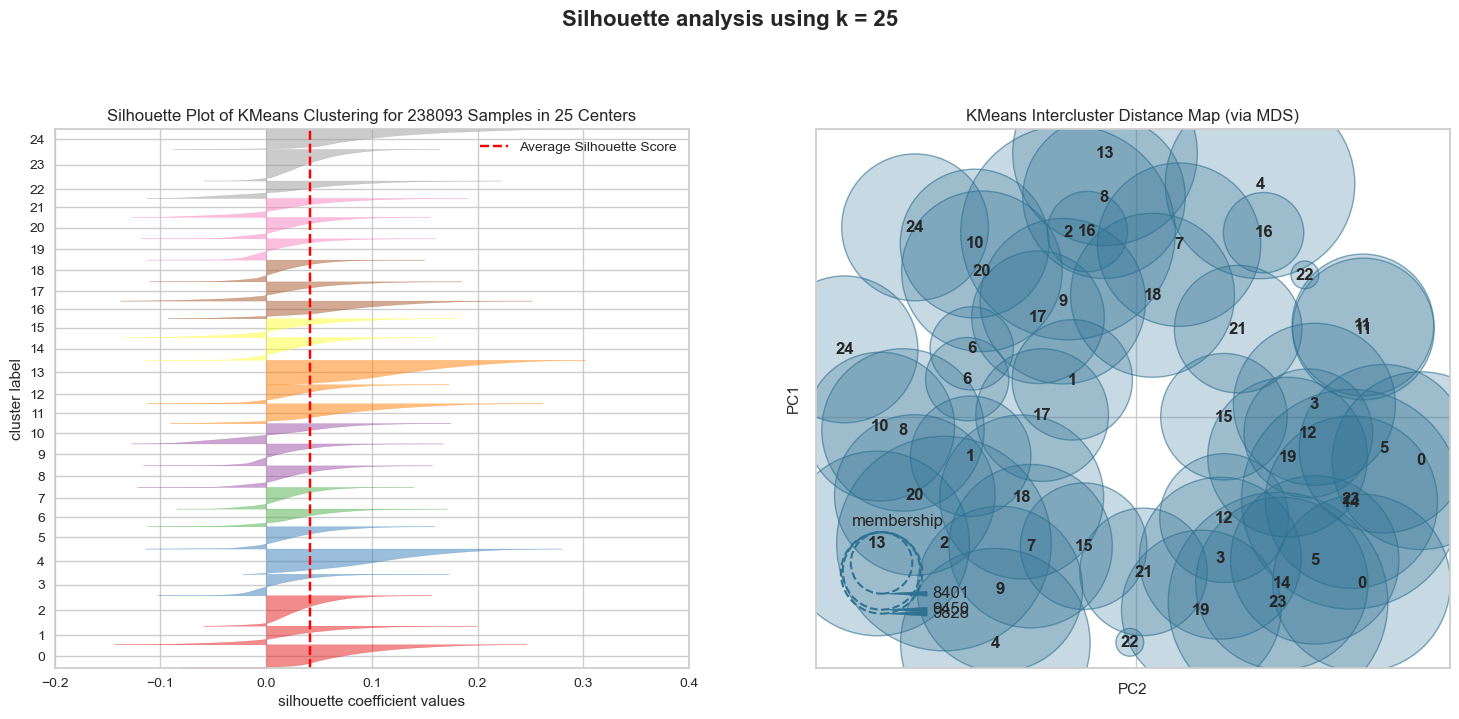

Training kMeans model with 50 clusters...


/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Generating silhouette plot...
Generating intercluster distance plot...


/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


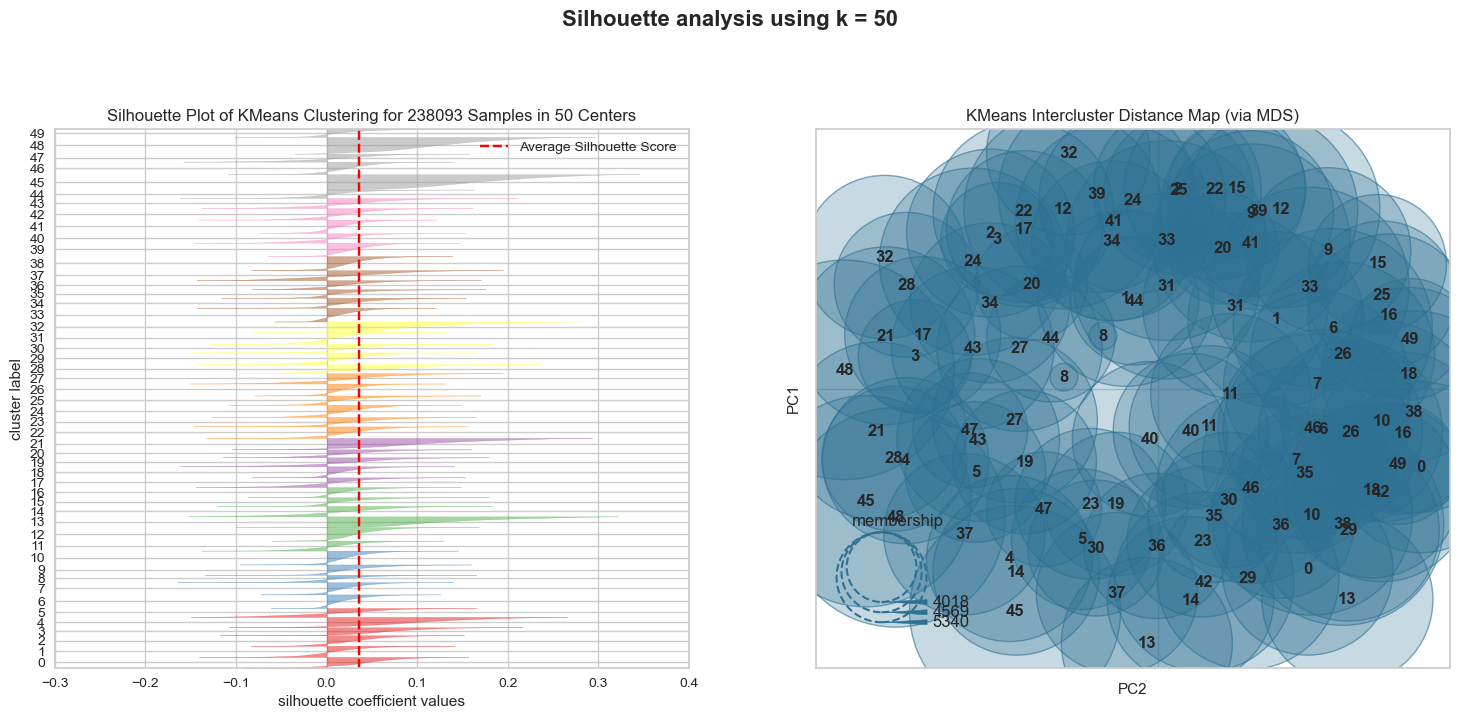

Training kMeans model with 100 clusters...


/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Generating silhouette plot...
Generating intercluster distance plot...


/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


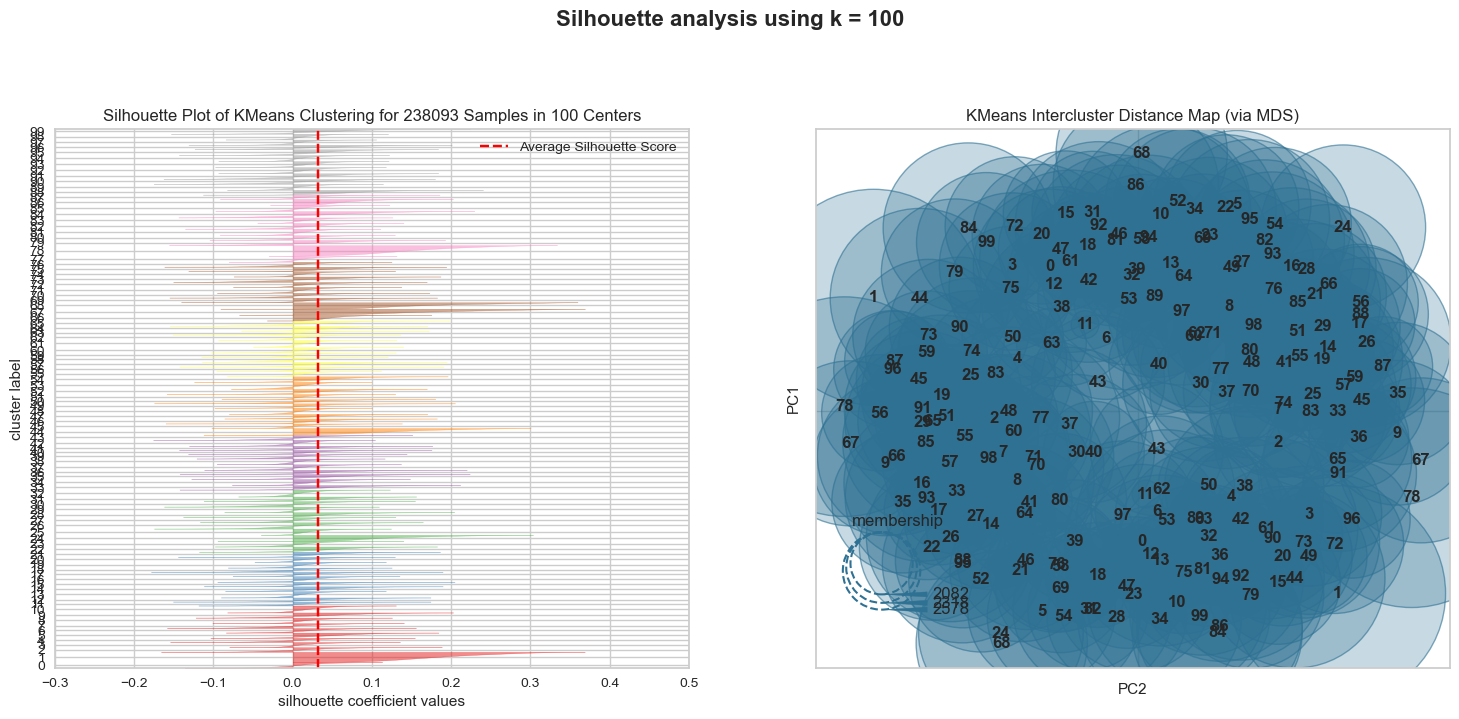

Training kMeans model with 200 clusters...


/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Generating silhouette plot...
Generating intercluster distance plot...


/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


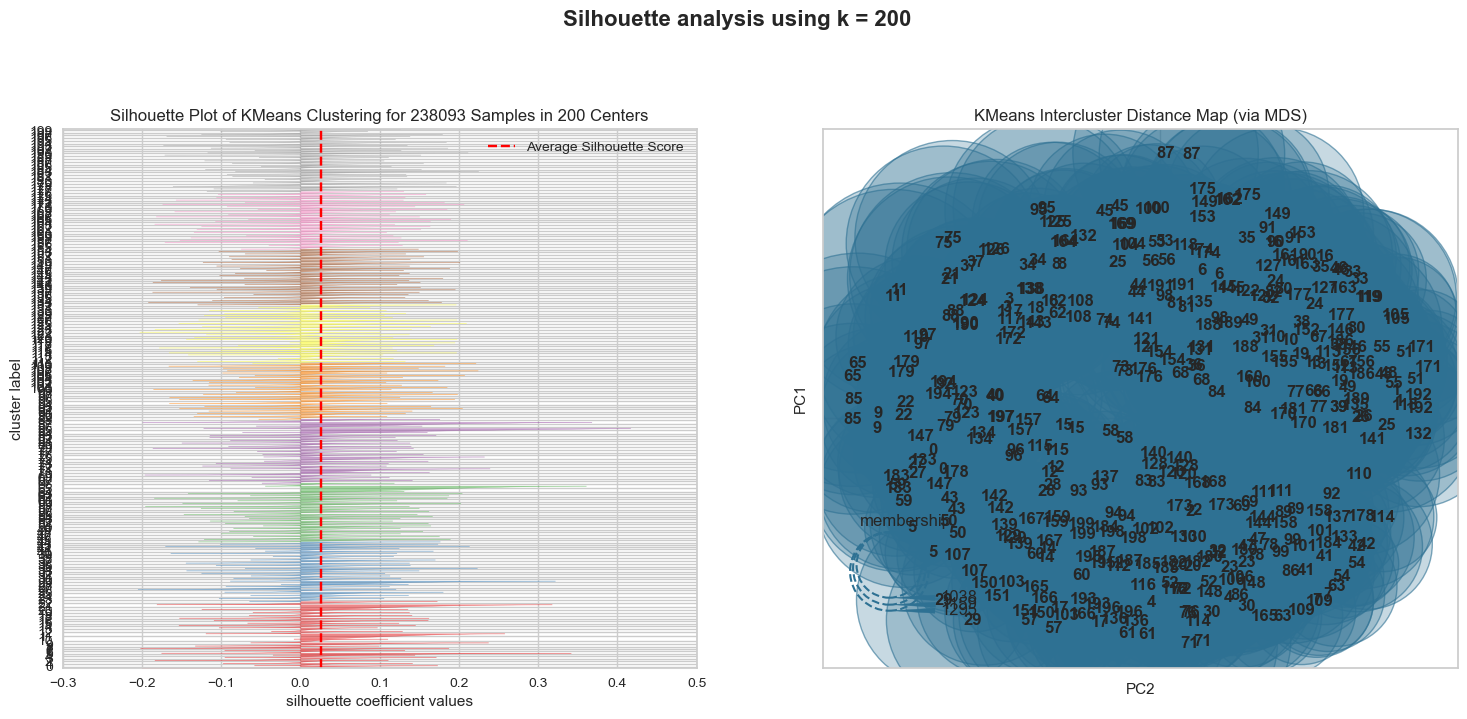

Training kMeans model with 500 clusters...


/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Generating silhouette plot...
Generating intercluster distance plot...


/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/brenton/miniconda3/envs/SIT789-Task4-3P/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


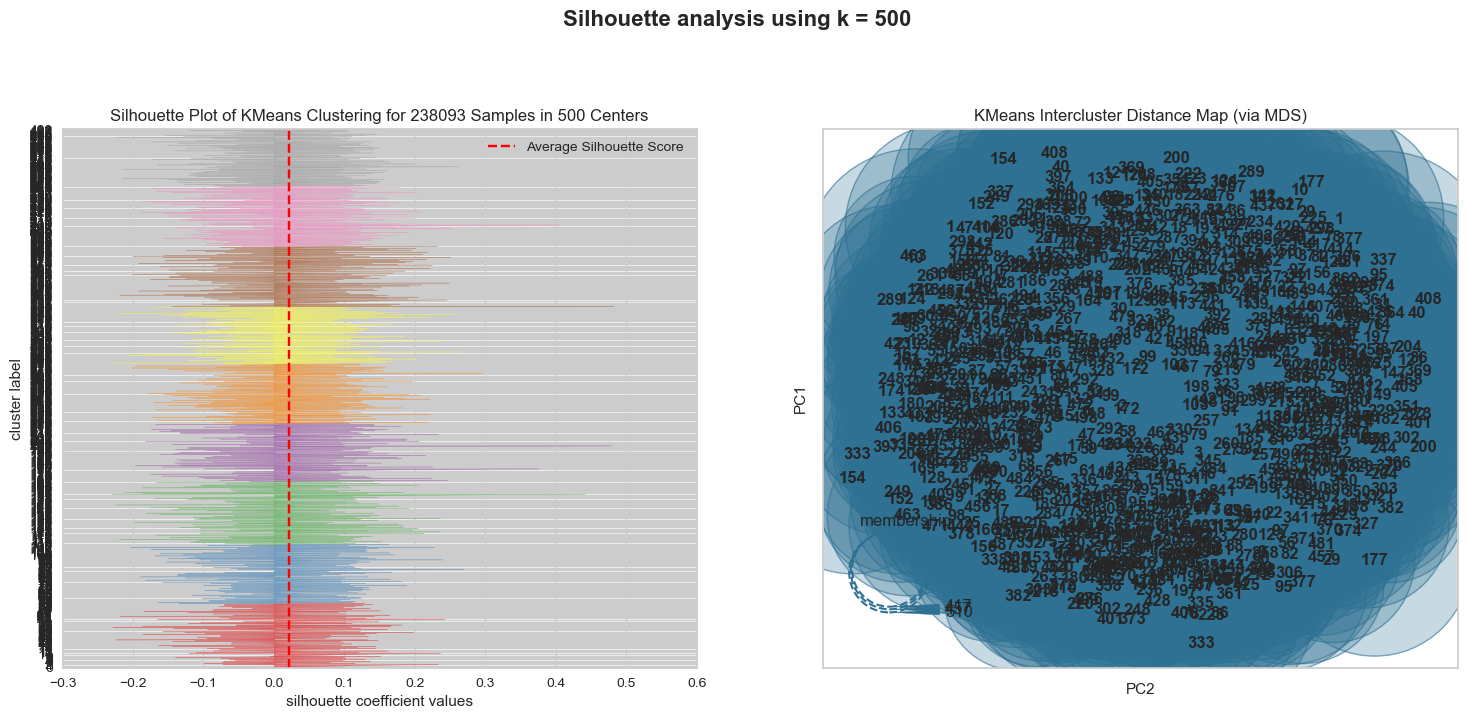

In [7]:
for i, k in enumerate([25,50,100,200,500]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    print(f"Training kMeans model with {k} clusters...")
    labels = km.fit_predict(training_data)
    
    # Silhouette plot
    print("Generating silhouette plot...")
    silhouette_vis = silhouette_visualizer(km, training_data, ax=ax1, is_fitted=True, show=False)
    
    # Scatter plot of data colored with labels
    print("Generating intercluster distance plot...")
    scatter_vis = intercluster_distance(km, training_data, ax=ax2, is_fitted=True, show=False)
    scatter_vis.fit(training_data)

    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05)
    plt.show()